# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
sns.set()

import itertools

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

# Log-Likelihood Test 

In [2]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

# Reading the Dataset

### Full Dataset

In [3]:
data = pd.read_csv('web_scrapped_data.csv')
data = data.drop([0], axis=0)
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')

data.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
1994-01-06,467.119995,2220.629883,3403.000000,18124.009766,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,100.595136,100.194542,101.263591,100.000000,0.595136,1.263591,0.194542,-2.069078e-09,100.000000,100.000000,100.000000,1.000000e+02,0.354187,0.037847,1.596662,4.281085e-18
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,101.744732,100.196796,101.104910,101.762467,1.142795,-0.156701,0.002249,1.762467e+00,192.022581,-12.401212,1.156270,-8.518126e+10,1.305981,0.000005,0.024555,3.106290e+00
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,101.500687,100.336401,100.317368,101.993158,-0.239860,-0.778935,0.139330,2.266960e-01,-40.303454,-61.644578,71.619440,-1.095638e+10,0.057533,0.019413,0.606740,5.139109e-02
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,101.509252,98.263113,99.089039,103.696042,0.008438,-1.224443,-2.066336,1.669606e+00,1.417879,-96.901880,-1062.151695,-8.069323e+10,0.000071,4.269745,1.499262,2.787584e+00


### Traininig Data

In [4]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop([0], axis=0)
train_df.Date = pd.to_datetime(train_df.Date)
train_df = train_df.set_index('Date')

train_df.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
1994-01-06,467.119995,2220.629883,3403.000000,18124.009766,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,100.595136,100.194542,101.263591,100.000000,0.595136,1.263591,0.194542,-2.069078e-09,100.000000,100.000000,100.000000,1.000000e+02,0.354187,0.037847,1.596662,4.281085e-18
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,101.744732,100.196796,101.104910,101.762467,1.142795,-0.156701,0.002249,1.762467e+00,192.022581,-12.401212,1.156270,-8.518126e+10,1.305981,0.000005,0.024555,3.106290e+00
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,101.500687,100.336401,100.317368,101.993158,-0.239860,-0.778935,0.139330,2.266960e-01,-40.303454,-61.644578,71.619440,-1.095638e+10,0.057533,0.019413,0.606740,5.139109e-02
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,101.509252,98.263113,99.089039,103.696042,0.008438,-1.224443,-2.066336,1.669606e+00,1.417879,-96.901880,-1062.151695,-8.069323e+10,0.000071,4.269745,1.499262,2.787584e+00


### Testing Data

In [5]:
test_df = pd.read_csv('test.csv')
test_df = test_df.drop([0], axis=0)
test_df.Date = pd.to_datetime(test_df.Date)
test_df = test_df.set_index('Date')

test_df.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,422.435359,437.687083,197.193653,84.943455,-0.193210,-0.527714,-0.650103,0.642878,-32.464781,-41.763021,-334.170049,-3.107073e+10,0.037330,0.422634,0.278482,0.413292
2014-07-16,1981.569946,9859.269531,6784.700195,15379.299805,424.210046,443.985268,199.374087,84.855945,0.420108,1.105733,1.438970,-0.103022,70.590347,87.507175,739.668688,4.979110e+09,0.176491,2.070634,1.222645,0.010613
2014-07-17,1958.119995,9753.879883,6738.299805,15370.259766,419.189933,439.239333,198.010573,84.806066,-1.183403,-0.683897,-1.068940,-0.058781,-198.845784,-54.123325,-549.463410,2.840906e+09,1.400442,1.142632,0.467716,0.003455
2014-07-18,1978.219971,9720.019531,6749.500000,15215.709961,423.492891,437.714524,198.339700,83.953331,1.026494,0.166217,-0.347148,-1.005512,172.480531,13.154331,-178.443043,4.859710e+10,1.053689,0.120511,0.027628,1.011054
2014-07-21,1973.630005,9612.049805,6728.399902,15215.709961,422.510281,432.852403,197.719656,83.953331,-0.232025,-0.312617,-1.110797,0.000000,-38.986902,-24.740380,-570.979380,-0.000000e+00,0.053836,1.233871,0.097730,0.000000


# ACF and PACF Plot Function

In [6]:
def acf_pacf(series, label_str):
    plt.rcParams['figure.figsize'] = 20, 5
    fig, (ax0, ax1) = plt.subplots(1, 2)

    sgt.plot_acf(series, zero = False, lags = 40, ax=ax0)
    ax0.set_title("ACF for "+label_str, size = 20)

    sgt.plot_pacf(series, zero = False, lags = 40, ax=ax1)
    ax1.set_title("PACF for "+label_str, size = 20)

    plt.show()

# ARMA For SPX Returns

#### ACF and PACF Plots for SPX Returns

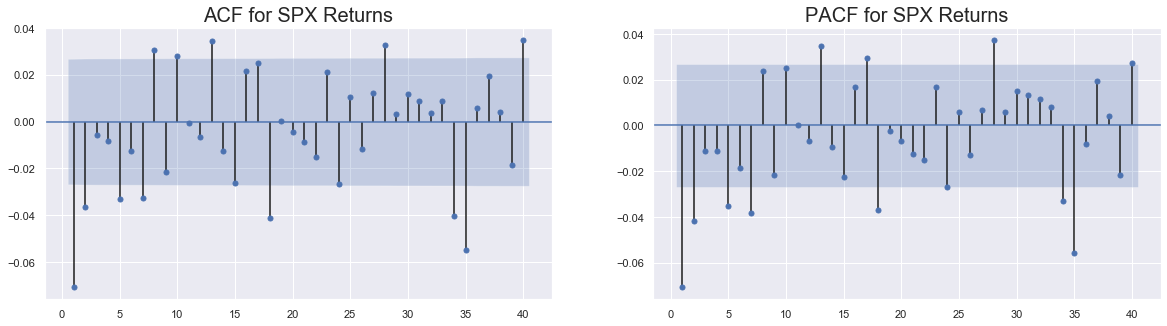

In [7]:
acf_pacf(train_df.spx_ret[1:], "SPX Returns")

#### Defining Max Lags based on ACF and PACF plots

In [8]:
p_list = q_list = range(0, 8)

In [9]:
p_q = list(itertools.product(p_list, q_list))

#### Fitting all models with lags $<=$ max_lags

ARMA(0, 0) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 0)   Log Likelihood               -8499.085
Method:                           css   S.D. of innovations              1.184
Date:                Sat, 13 Jun 2020   AIC                          17002.170
Time:                        18:17:24   BIC                          17015.340
Sample:                    01-07-1994   HQIC                         17006.770
                         - 07-14-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0340      0.016      2.099      0.036       0.002       0.066


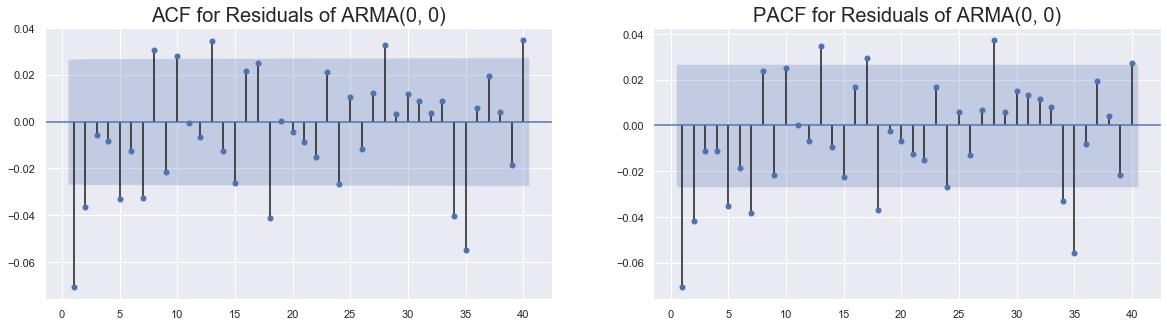

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(0, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 1)   Log Likelihood               -8484.544
Method:                       css-mle   S.D. of innovations              1.181
Date:                Sat, 13 Jun 2020   AIC                          16975.088
Time:                        18:17:25   BIC                          16994.843
Sample:                    01-07-1994   HQIC                         16981.988
                         - 07-14-2014         

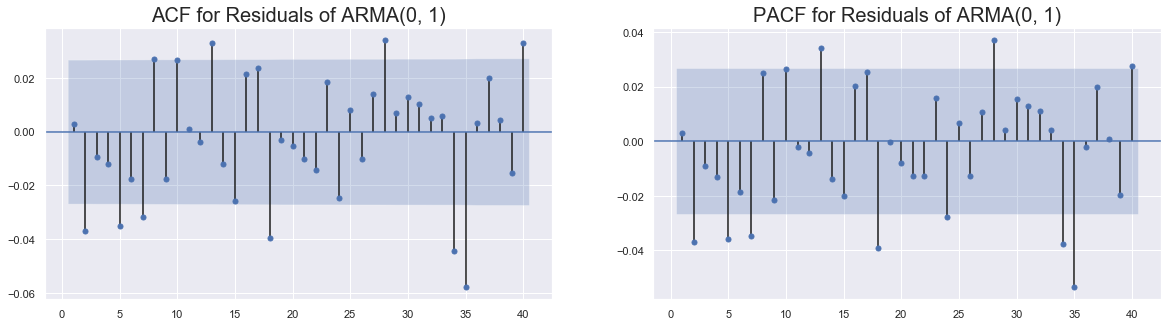

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(0, 2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 2)   Log Likelihood               -8480.584
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16969.168
Time:                        18:17:26   BIC                          16995.509
Sample:                    01-07-1994   HQIC                         16978.368
                         - 07-14-2014         

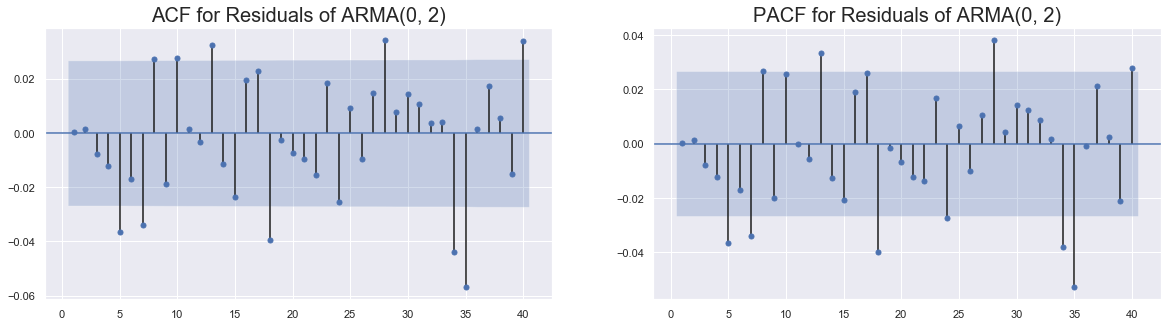

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(0, 3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 3)   Log Likelihood               -8480.276
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16970.552
Time:                        18:17:27   BIC                          17003.478
Sample:                    01-07-1994   HQIC                         16982.052
                         - 07-14-2014         

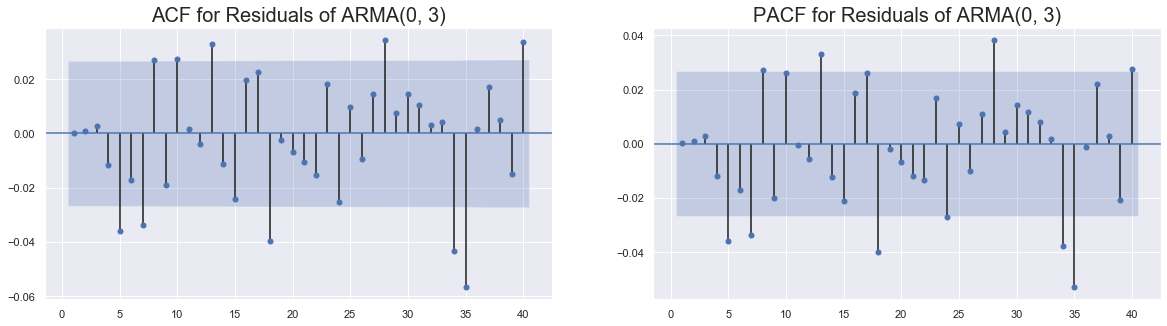

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(0, 4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 4)   Log Likelihood               -8479.648
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16971.296
Time:                        18:17:28   BIC                          17010.808
Sample:                    01-07-1994   HQIC                         16985.097
                         - 07-14-2014         

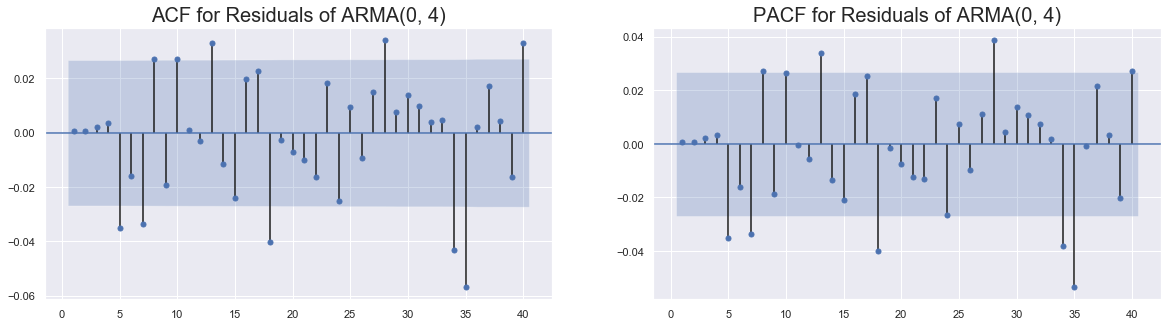

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(0, 5) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 5)   Log Likelihood               -8476.036
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16966.072
Time:                        18:17:30   BIC                          17012.168
Sample:                    01-07-1994   HQIC                         16982.172
                         - 07-14-2014         

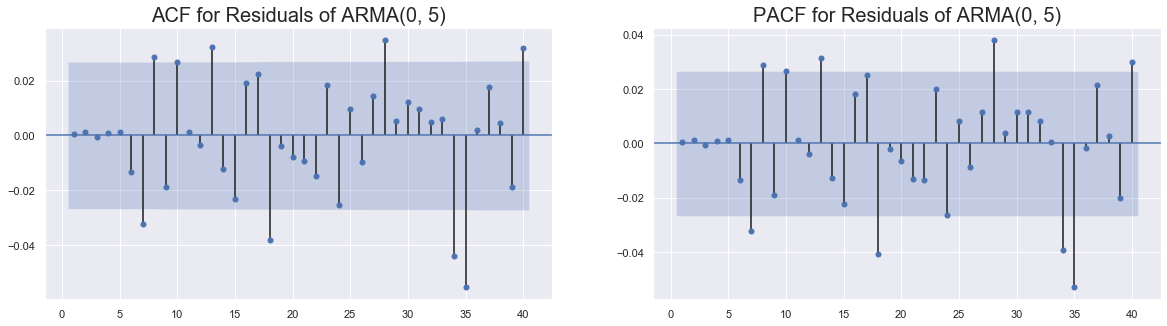

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(0, 6) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 6)   Log Likelihood               -8475.495
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16966.990
Time:                        18:17:32   BIC                          17019.672
Sample:                    01-07-1994   HQIC                         16985.391
                         - 07-14-2014         

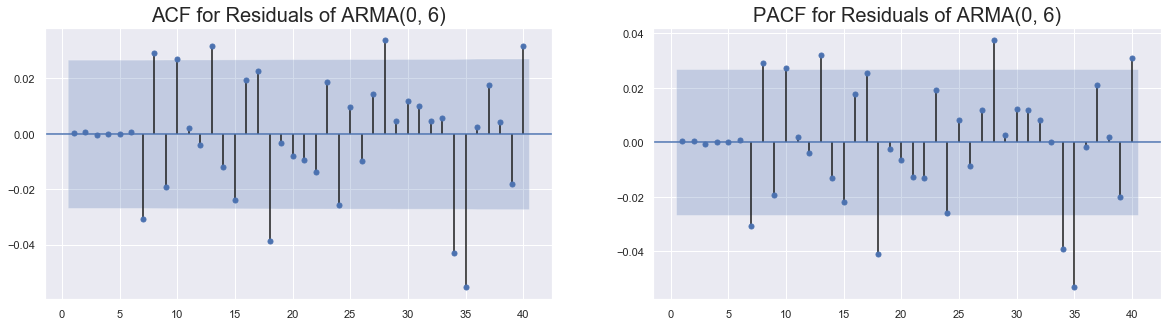

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(0, 7) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 7)   Log Likelihood               -8473.205
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16964.410
Time:                        18:17:34   BIC                          17023.677
Sample:                    01-07-1994   HQIC                         16985.110
                         - 07-14-2014         

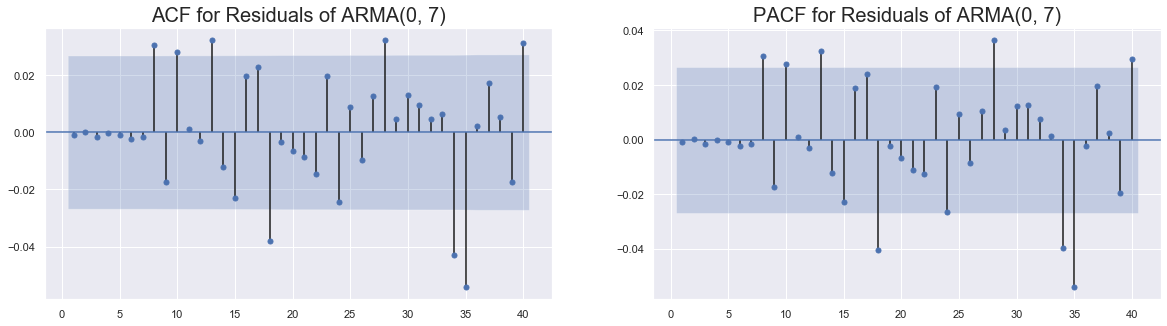

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(1, 0) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(1, 0)   Log Likelihood               -8485.701
Method:                       css-mle   S.D. of innovations              1.181
Date:                Sat, 13 Jun 2020   AIC                          16977.402
Time:                        18:17:36   BIC                          16997.158
Sample:                    01-07-1994   HQIC                         16984.302
                         - 07-14-2014         

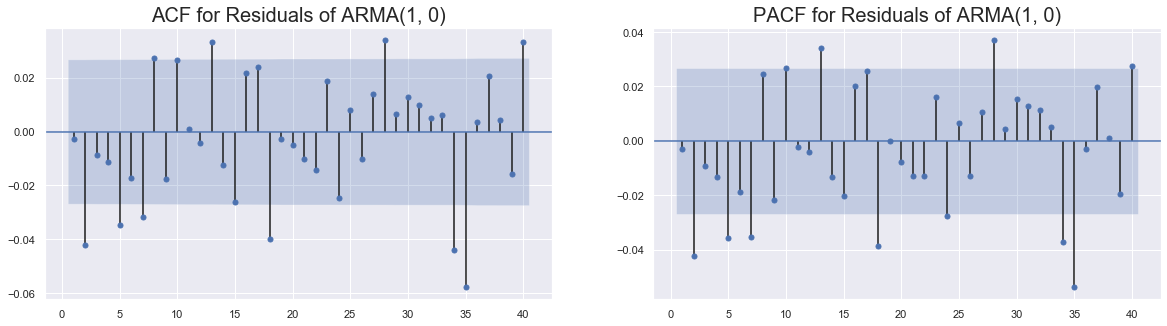

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(1, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(1, 1)   Log Likelihood               -8478.210
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16964.420
Time:                        18:17:38   BIC                          16990.761
Sample:                    01-07-1994   HQIC                         16973.620
                         - 07-14-2014         

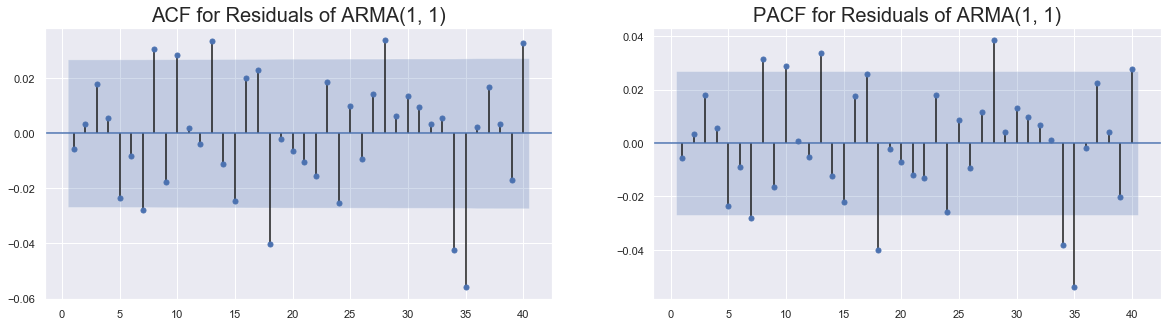

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(1, 2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(1, 2)   Log Likelihood               -8477.772
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16965.545
Time:                        18:17:40   BIC                          16998.471
Sample:                    01-07-1994   HQIC                         16977.045
                         - 07-14-2014         

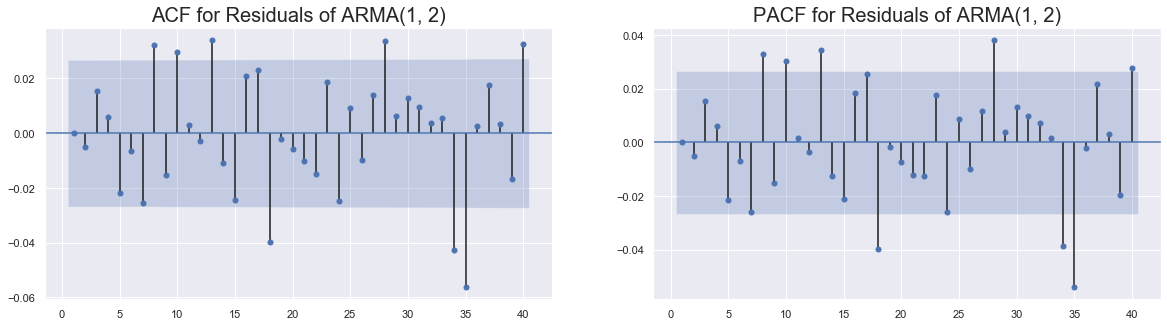

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(2, 0) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(2, 0)   Log Likelihood               -8481.048
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16970.095
Time:                        18:17:45   BIC                          16996.436
Sample:                    01-07-1994   HQIC                         16979.295
                         - 07-14-2014         

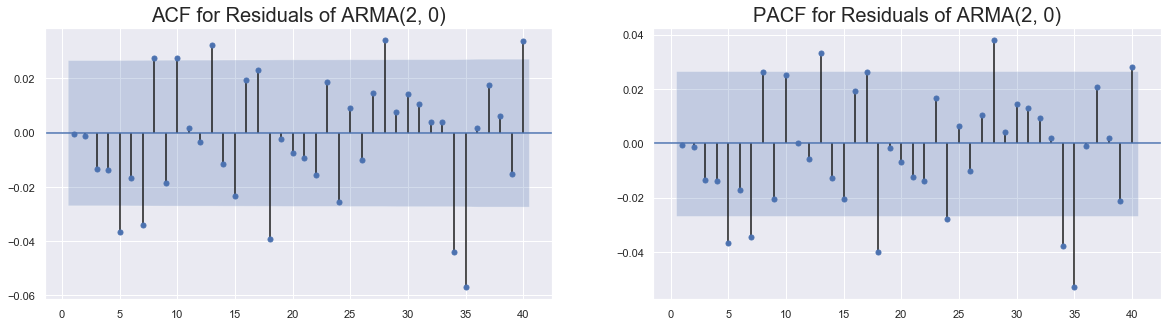

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(2, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(2, 1)   Log Likelihood               -8477.790
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16965.579
Time:                        18:17:47   BIC                          16998.505
Sample:                    01-07-1994   HQIC                         16977.080
                         - 07-14-2014         

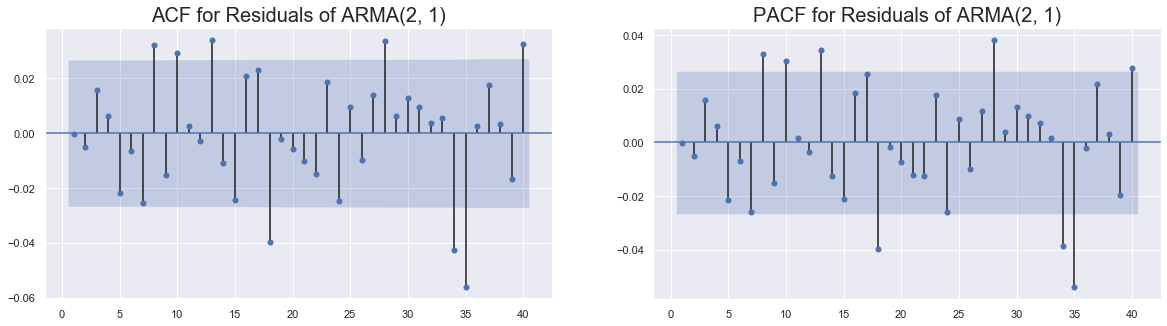

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(2, 2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(2, 2)   Log Likelihood               -8477.424
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16966.849
Time:                        18:17:49   BIC                          17006.360
Sample:                    01-07-1994   HQIC                         16980.649
                         - 07-14-2014         

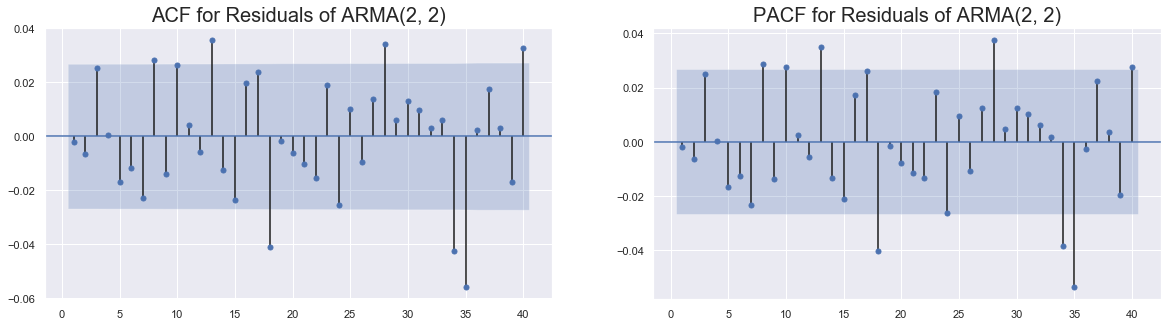

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(3, 0) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(3, 0)   Log Likelihood               -8480.703
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16971.406
Time:                        18:17:54   BIC                          17004.332
Sample:                    01-07-1994   HQIC                         16982.906
                         - 07-14-2014         

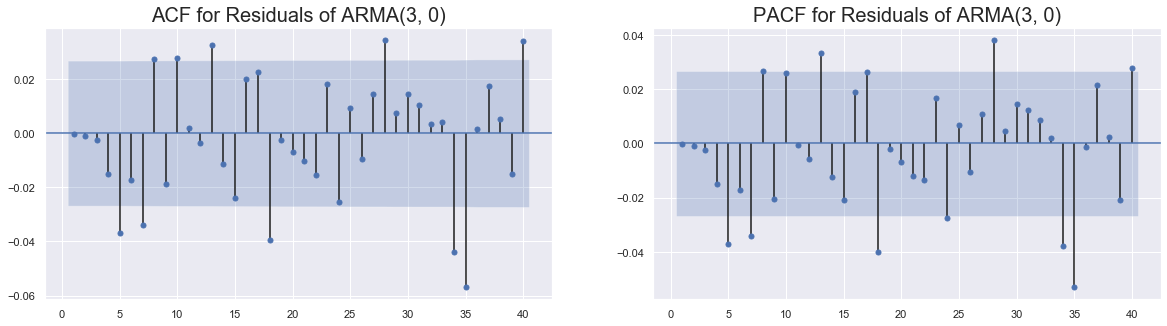

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(3, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(3, 1)   Log Likelihood               -8477.568
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16967.136
Time:                        18:17:56   BIC                          17006.648
Sample:                    01-07-1994   HQIC                         16980.937
                         - 07-14-2014         

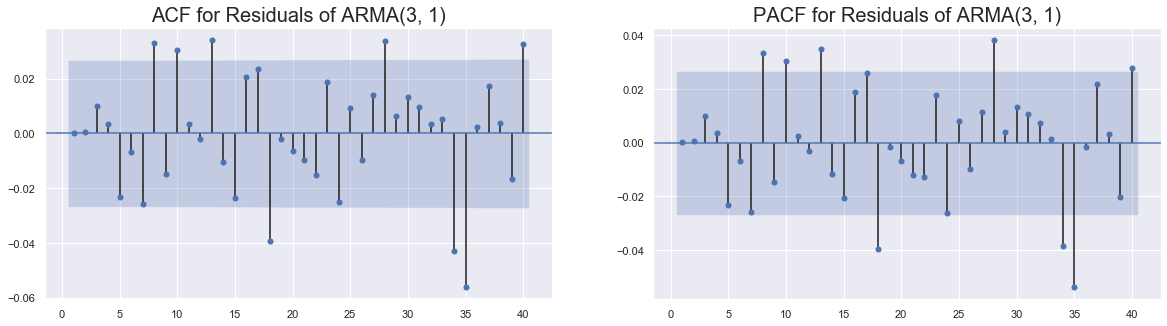

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(3, 2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(3, 2)   Log Likelihood               -8477.359
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16968.718
Time:                        18:17:59   BIC                          17014.815
Sample:                    01-07-1994   HQIC                         16984.819
                         - 07-14-2014         

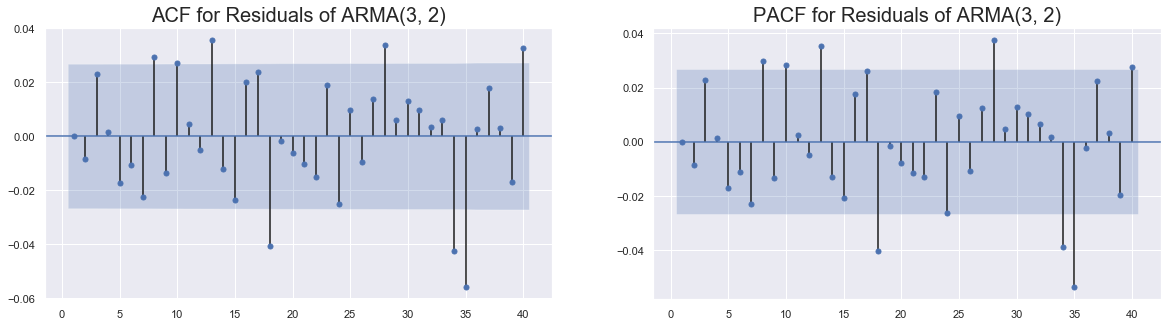

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(4, 0) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(4, 0)   Log Likelihood               -8480.358
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16972.716
Time:                        18:18:04   BIC                          17012.228
Sample:                    01-07-1994   HQIC                         16986.517
                         - 07-14-2014         

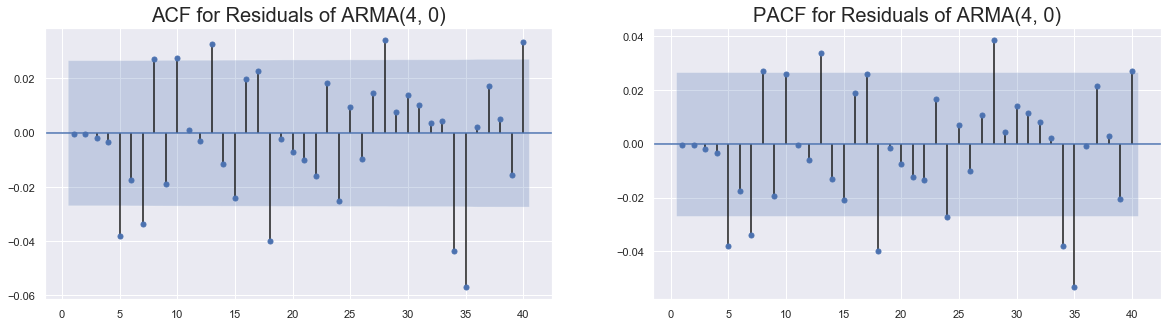

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(4, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(4, 1)   Log Likelihood               -8476.881
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16967.762
Time:                        18:18:06   BIC                          17013.859
Sample:                    01-07-1994   HQIC                         16983.863
                         - 07-14-2014         

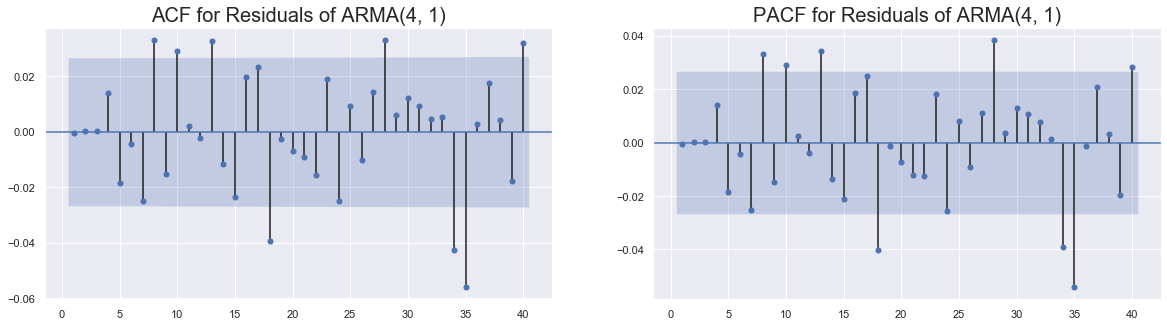

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(4, 2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(4, 2)   Log Likelihood               -8476.520
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16969.040
Time:                        18:18:09   BIC                          17021.721
Sample:                    01-07-1994   HQIC                         16987.440
                         - 07-14-2014         

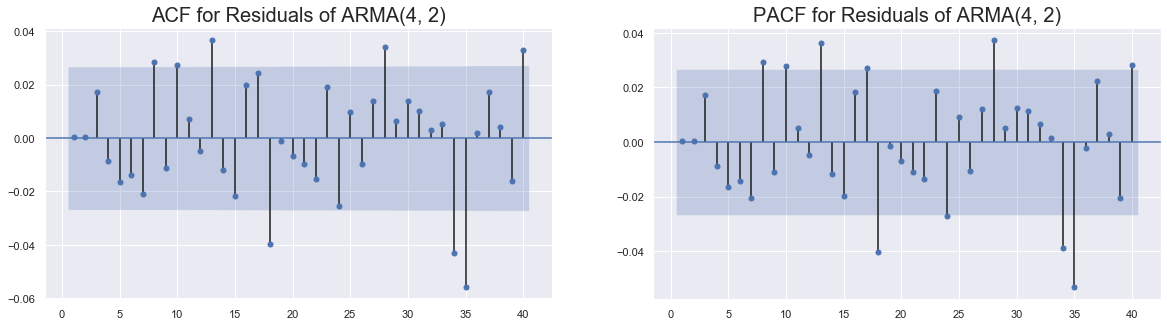

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(4, 3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(4, 3)   Log Likelihood               -8466.051
Method:                       css-mle   S.D. of innovations              1.177
Date:                Sat, 13 Jun 2020   AIC                          16950.102
Time:                        18:18:18   BIC                          17009.369
Sample:                    01-07-1994   HQIC                         16970.803
                         - 07-14-2014         

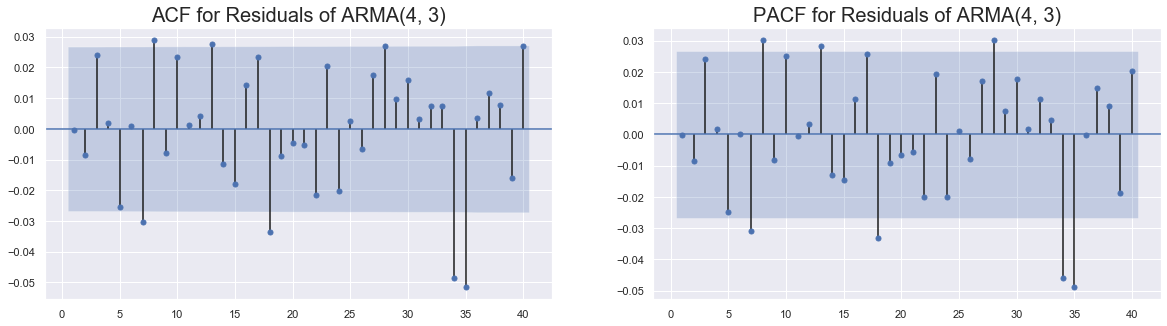

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(4, 4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(4, 4)   Log Likelihood               -8473.548
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16967.096
Time:                        18:18:26   BIC                          17032.948
Sample:                    01-07-1994   HQIC                         16990.097
                         - 07-14-2014         

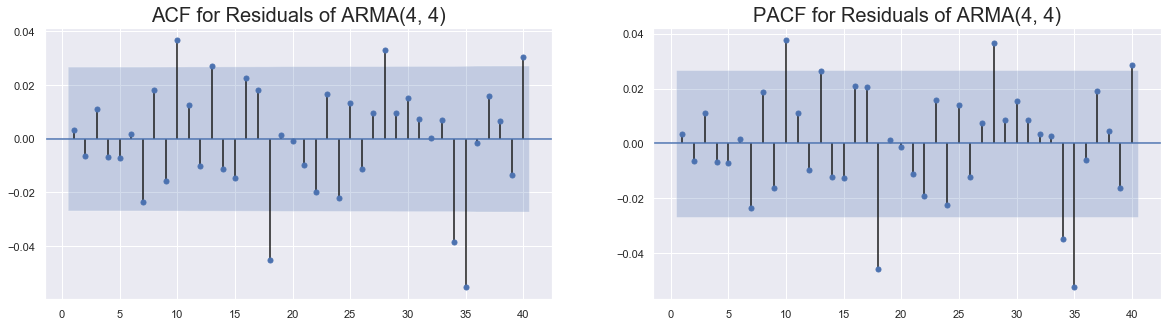

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(5, 0) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(5, 0)   Log Likelihood               -8477.013
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16968.027
Time:                        18:18:31   BIC                          17014.123
Sample:                    01-07-1994   HQIC                         16984.127
                         - 07-14-2014         

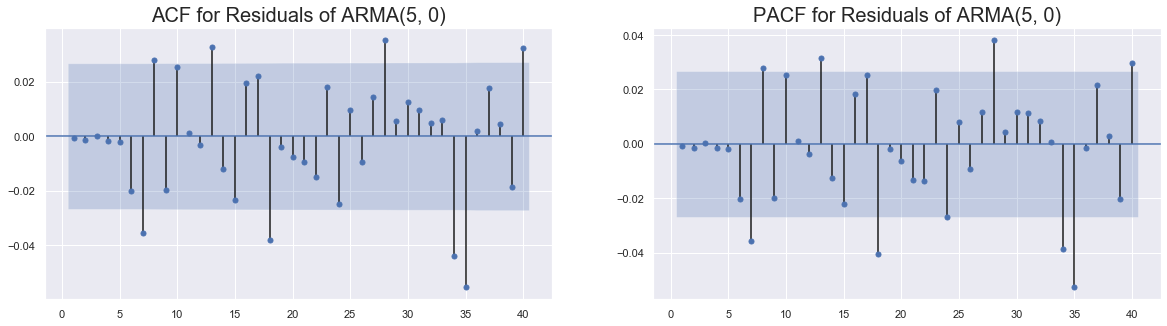

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(5, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(5, 1)   Log Likelihood               -8474.950
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16965.900
Time:                        18:18:33   BIC                          17018.582
Sample:                    01-07-1994   HQIC                         16984.301
                         - 07-14-2014         

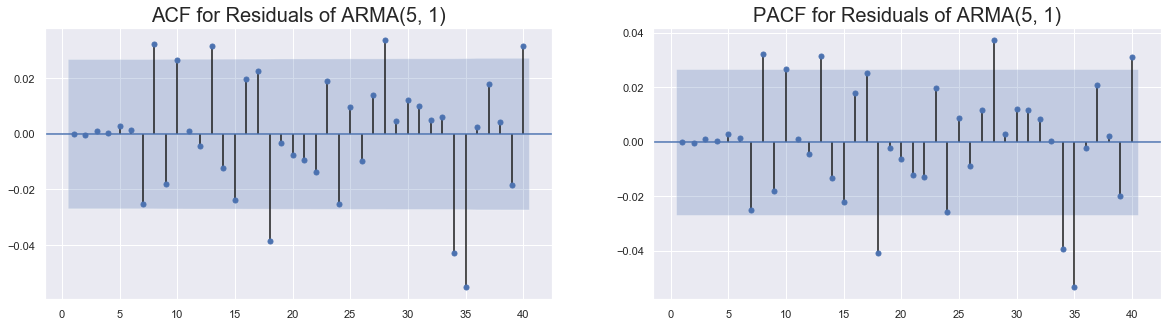

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(5, 2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(5, 2)   Log Likelihood               -8473.298
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16964.596
Time:                        18:18:36   BIC                          17023.863
Sample:                    01-07-1994   HQIC                         16985.297
                         - 07-14-2014         

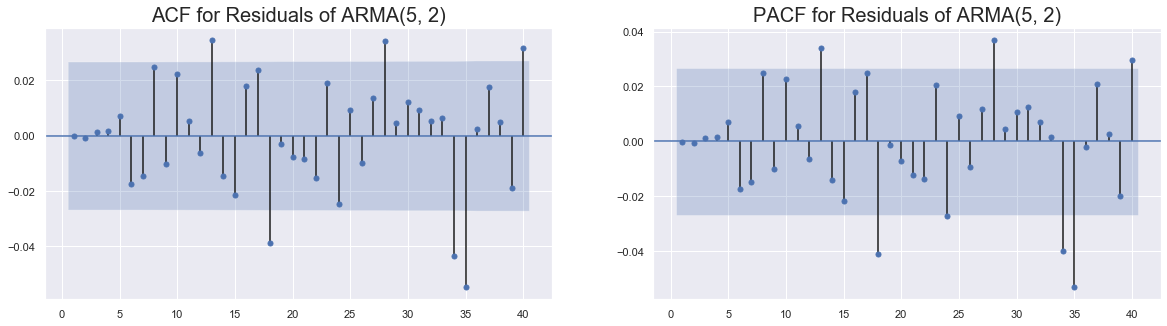

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(5, 3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(5, 3)   Log Likelihood               -8472.151
Method:                       css-mle   S.D. of innovations              1.178
Date:                Sat, 13 Jun 2020   AIC                          16964.302
Time:                        18:18:39   BIC                          17030.154
Sample:                    01-07-1994   HQIC                         16987.302
                         - 07-14-2014         

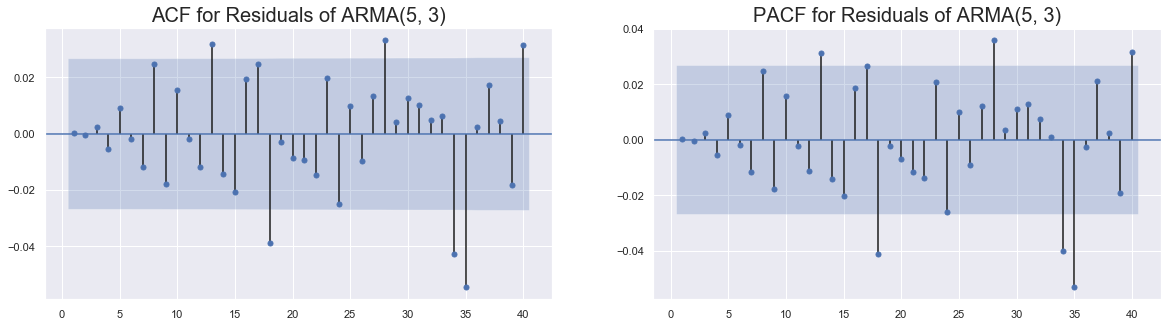

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(5, 4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(5, 4)   Log Likelihood               -8465.017
Method:                       css-mle   S.D. of innovations              1.177
Date:                Sat, 13 Jun 2020   AIC                          16952.034
Time:                        18:18:48   BIC                          17024.472
Sample:                    01-07-1994   HQIC                         16977.335
                         - 07-14-2014         

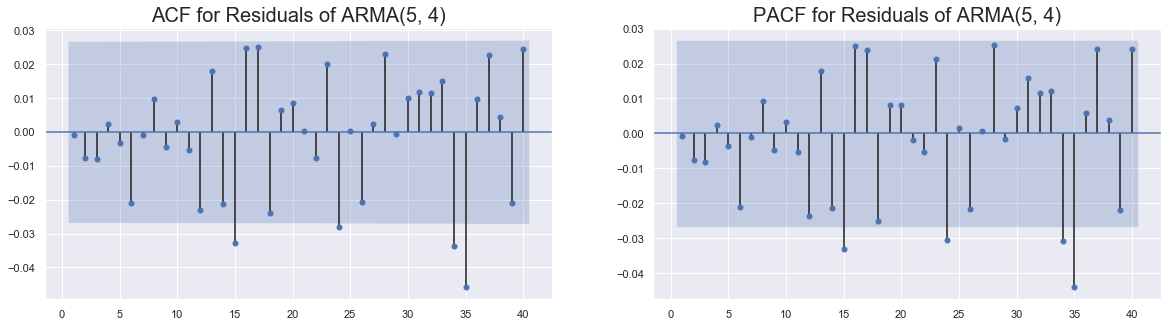

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(6, 0) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(6, 0)   Log Likelihood               -8476.083
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16968.166
Time:                        18:18:53   BIC                          17020.848
Sample:                    01-07-1994   HQIC                         16986.567
                         - 07-14-2014         

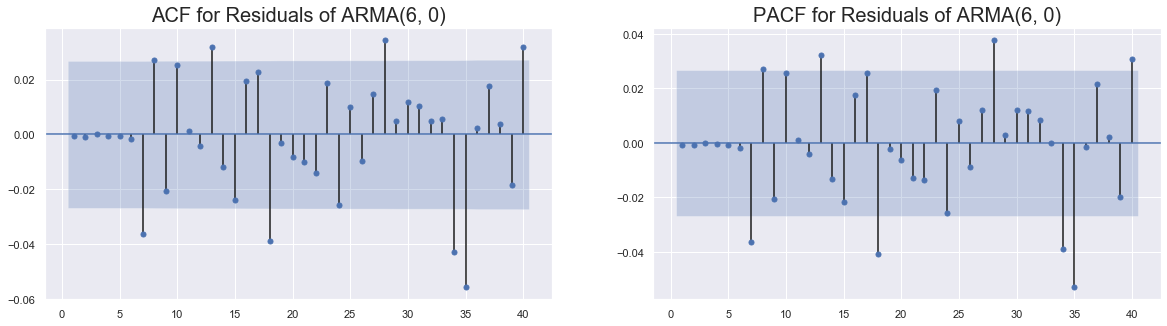

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(6, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(6, 1)   Log Likelihood               -8474.838
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16967.675
Time:                        18:18:55   BIC                          17026.942
Sample:                    01-07-1994   HQIC                         16988.376
                         - 07-14-2014         

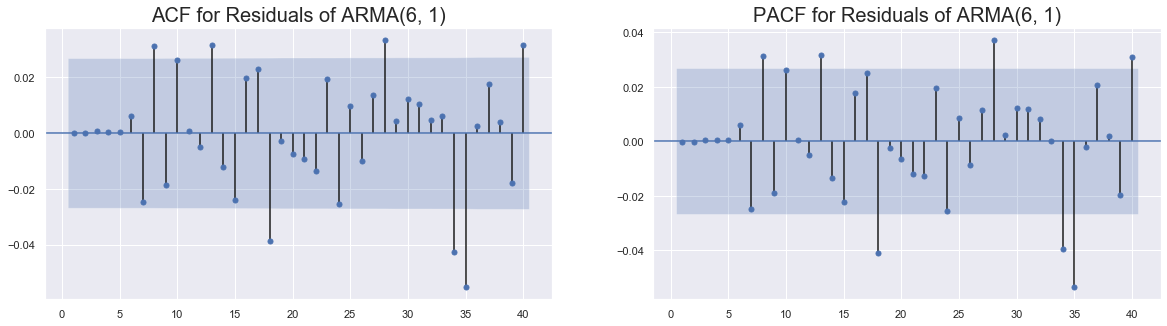

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(6, 2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(6, 2)   Log Likelihood               -8473.250
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16966.499
Time:                        18:18:58   BIC                          17032.351
Sample:                    01-07-1994   HQIC                         16989.500
                         - 07-14-2014         

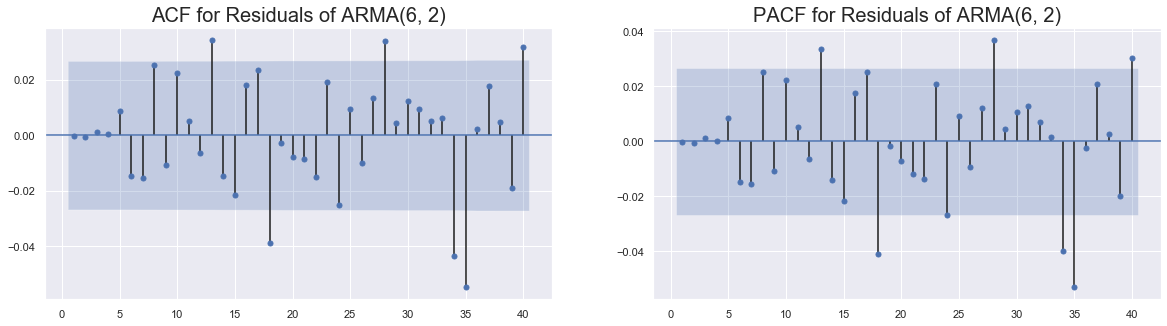

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(6, 3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(6, 3)   Log Likelihood               -8468.004
Method:                       css-mle   S.D. of innovations              1.177
Date:                Sat, 13 Jun 2020   AIC                          16958.008
Time:                        18:19:06   BIC                          17030.446
Sample:                    01-07-1994   HQIC                         16983.309
                         - 07-14-2014         

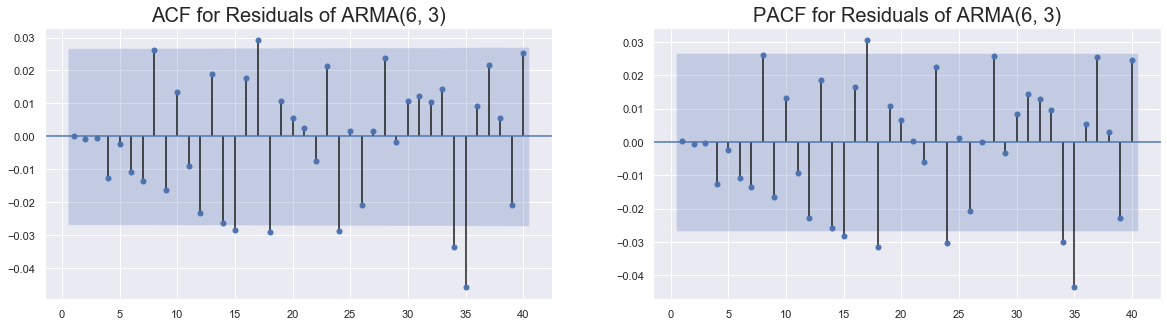

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(6, 4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(6, 4)   Log Likelihood               -8462.493
Method:                       css-mle   S.D. of innovations              1.176
Date:                Sat, 13 Jun 2020   AIC                          16948.985
Time:                        18:19:18   BIC                          17028.008
Sample:                    01-07-1994   HQIC                         16976.586
                         - 07-14-2014         

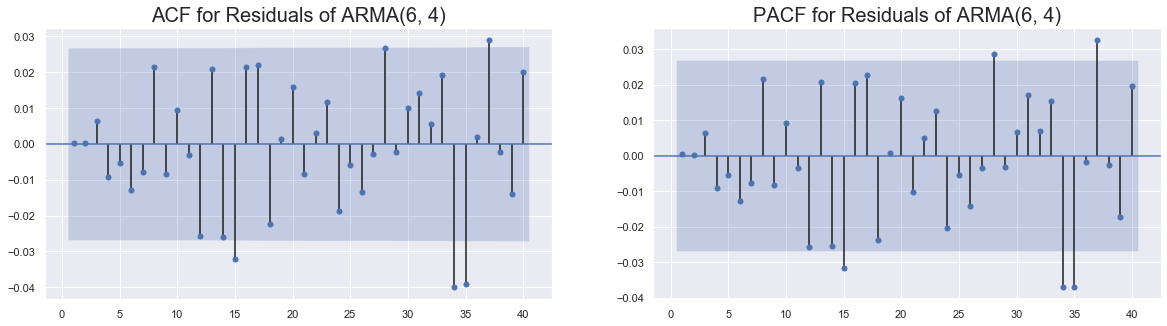

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(6, 5) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(6, 5)   Log Likelihood               -8468.797
Method:                       css-mle   S.D. of innovations              1.178
Date:                Sat, 13 Jun 2020   AIC                          16963.594
Time:                        18:19:42   BIC                          17049.202
Sample:                    01-07-1994   HQIC                         16993.495
                         - 07-14-2014         

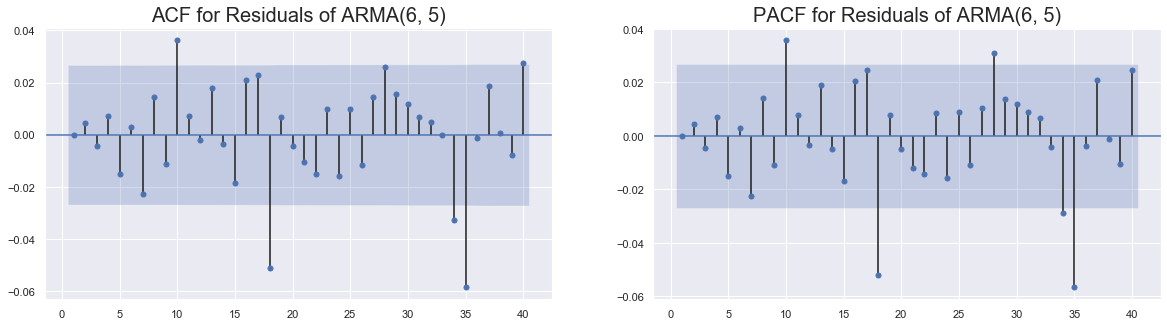

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(7, 0) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 0)   Log Likelihood               -8472.193
Method:                       css-mle   S.D. of innovations              1.178
Date:                Sat, 13 Jun 2020   AIC                          16962.386
Time:                        18:19:48   BIC                          17021.653
Sample:                    01-07-1994   HQIC                         16983.087
                         - 07-14-2014         

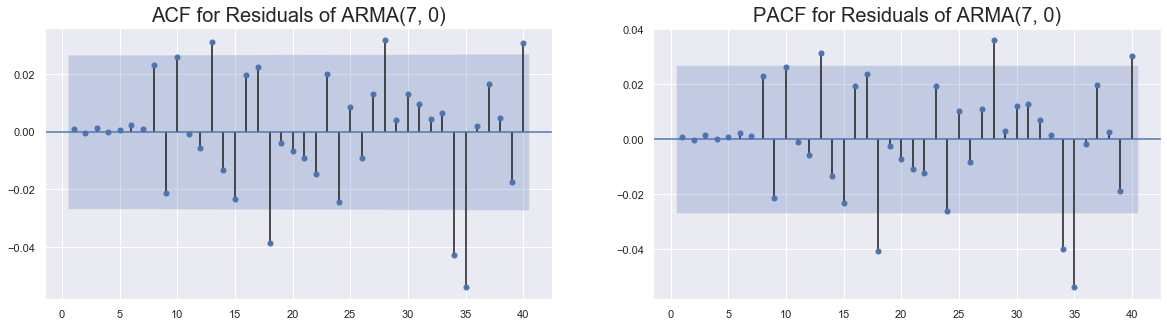

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(7, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 1)   Log Likelihood               -8469.205
Method:                       css-mle   S.D. of innovations              1.178
Date:                Sat, 13 Jun 2020   AIC                          16958.411
Time:                        18:19:51   BIC                          17024.263
Sample:                    01-07-1994   HQIC                         16981.412
                         - 07-14-2014         

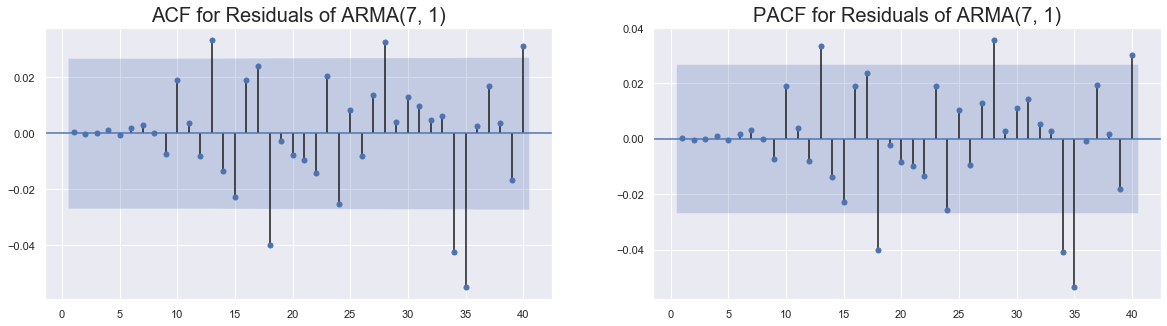

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(7, 2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 2)   Log Likelihood               -8468.263
Method:                       css-mle   S.D. of innovations              1.177
Date:                Sat, 13 Jun 2020   AIC                          16958.526
Time:                        18:19:59   BIC                          17030.963
Sample:                    01-07-1994   HQIC                         16983.827
                         - 07-14-2014         

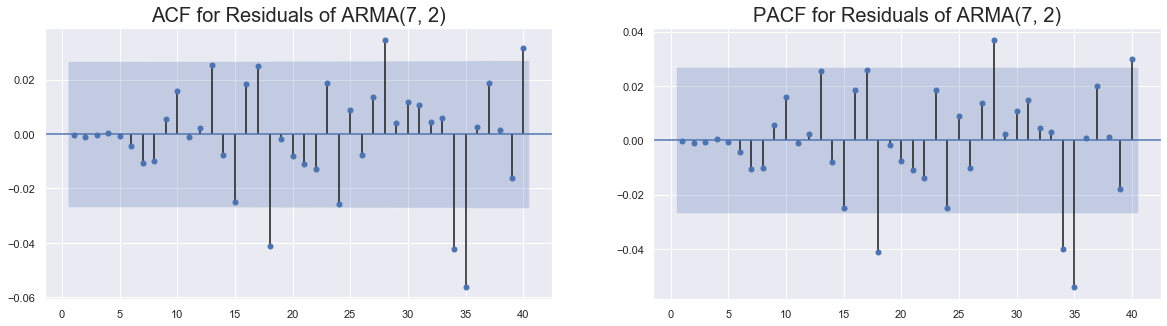

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(7, 3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 3)   Log Likelihood               -8467.704
Method:                       css-mle   S.D. of innovations              1.177
Date:                Sat, 13 Jun 2020   AIC                          16959.408
Time:                        18:20:13   BIC                          17038.431
Sample:                    01-07-1994   HQIC                         16987.009
                         - 07-14-2014         

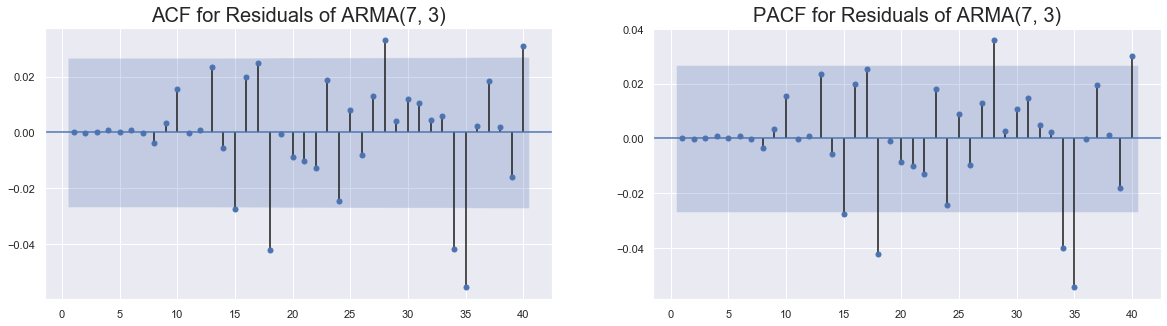

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(7, 4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 4)   Log Likelihood               -8457.499
Method:                       css-mle   S.D. of innovations              1.175
Date:                Sat, 13 Jun 2020   AIC                          16940.999
Time:                        18:20:30   BIC                          17026.607
Sample:                    01-07-1994   HQIC                         16970.900
                         - 07-14-2014         

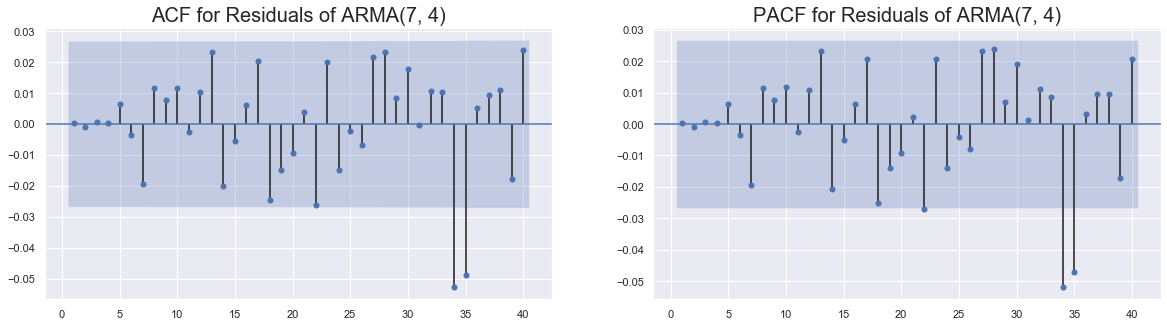

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(7, 5) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 5)   Log Likelihood               -8456.718
Method:                       css-mle   S.D. of innovations              1.175
Date:                Sat, 13 Jun 2020   AIC                          16941.435
Time:                        18:20:54   BIC                          17033.628
Sample:                    01-07-1994   HQIC                         16973.636
                         - 07-14-2014         

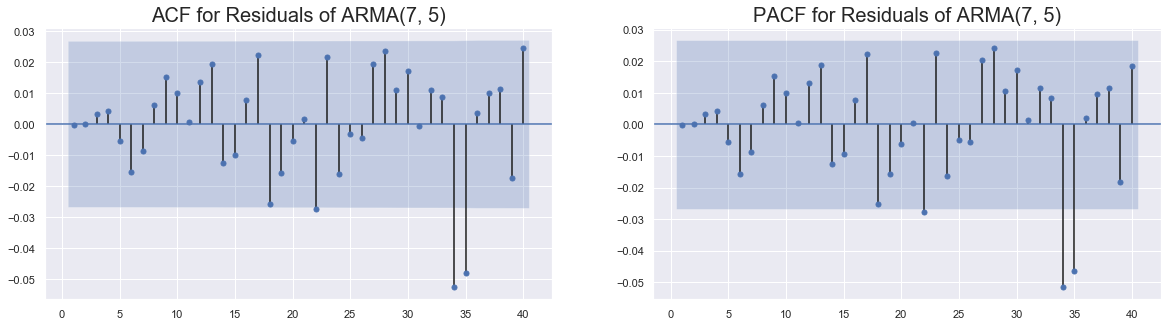

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
ARMA(7, 6) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(7, 6)   Log Likelihood               -8458.513
Method:                       css-mle   S.D. of innovations              1.175
Date:                Sat, 13 Jun 2020   AIC                          16947.027
Time:                        18:22:15   BIC                          17045.805
Sample:                    01-07-1994   HQIC                         16981.528
                         - 07-14-2014         

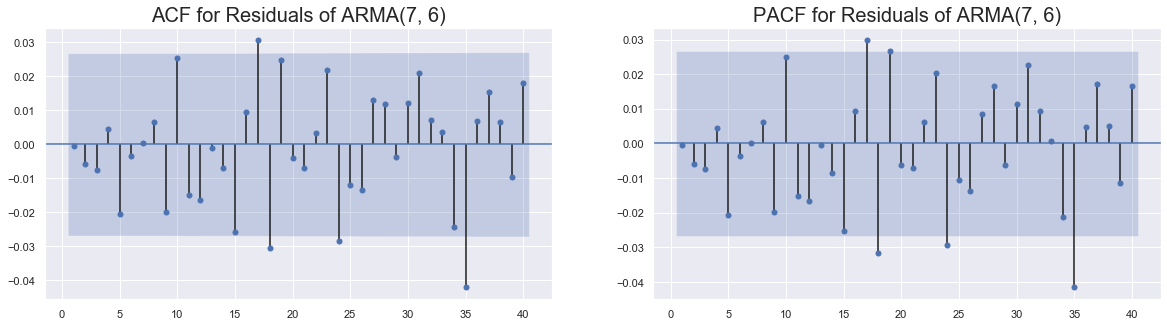

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [10]:
for param in p_q:
    try:
        p, q = param

        arma_model = ARMA(train_df.spx_ret[1:], order=(p, q))
        arma_model_results = arma_model.fit()

        print("ARMA("+str(p)+", "+str(q)+") MODEL")
        print(arma_model_results.summary())
        acf_pacf(arma_model_results.resid, "Residuals of ARMA("+str(p)+", "+str(q)+")")

        print("-------------------------------------------------------------------------------------------------------------------------------")
        print("-------------------------------------------------------------------------------------------------------------------------------")
        print("-------------------------------------------------------------------------------------------------------------------------------")
    except:
        continue

#### LLR Test between models with significant coefficients

#### ARMA(0, ...)

In [11]:
arma_0_0_ret = ARMA(train_df.spx_ret[1:], order=(0, 0)).fit()
arma_0_1_ret = ARMA(train_df.spx_ret[1:], order=(0, 1)).fit()
arma_0_2_ret = ARMA(train_df.spx_ret[1:], order=(0, 2)).fit()
arma_0_3_ret = ARMA(train_df.spx_ret[1:], order=(0, 3)).fit()
arma_0_4_ret = ARMA(train_df.spx_ret[1:], order=(0, 4)).fit()
arma_0_5_ret = ARMA(train_df.spx_ret[1:], order=(0, 5)).fit()
arma_0_6_ret = ARMA(train_df.spx_ret[1:], order=(0, 6)).fit()
arma_0_7_ret = ARMA(train_df.spx_ret[1:], order=(0, 7)).fit()

In [12]:
LLR_test(arma_0_0_ret, arma_0_1_ret, DF=1)

0.0

In [13]:
LLR_test(arma_0_1_ret, arma_0_2_ret, DF=1)

0.005

In [14]:
LLR_test(arma_0_2_ret, arma_0_3_ret, DF=1)

0.433

In [15]:
LLR_test(arma_0_2_ret, arma_0_4_ret, DF=2)

0.392

In [16]:
LLR_test(arma_0_2_ret, arma_0_5_ret, DF=3)

0.028

In [17]:
LLR_test(arma_0_5_ret, arma_0_6_ret, DF=1)

0.298

In [18]:
LLR_test(arma_0_5_ret, arma_0_7_ret, DF=2)

0.059

#### ARMA(1, ...)

In [19]:
arma_1_0_ret = ARMA(train_df.spx_ret[1:], order=(1, 0)).fit()
arma_1_1_ret = ARMA(train_df.spx_ret[1:], order=(1, 1)).fit()
arma_1_2_ret = ARMA(train_df.spx_ret[1:], order=(1, 2)).fit()

In [20]:
LLR_test(arma_1_0_ret, arma_1_1_ret, DF=1)

0.0

In [21]:
LLR_test(arma_1_1_ret, arma_1_2_ret, DF=1)

0.35

#### ARMA(2, ...)

In [22]:
arma_2_0_ret = ARMA(train_df.spx_ret[1:], order=(2, 0)).fit()
arma_2_1_ret = ARMA(train_df.spx_ret[1:], order=(2, 1)).fit()
arma_2_2_ret = ARMA(train_df.spx_ret[1:], order=(2, 2)).fit()

In [23]:
LLR_test(arma_2_0_ret, arma_2_1_ret, DF=1)

0.011

In [24]:
LLR_test(arma_2_1_ret, arma_2_2_ret, DF=1)

0.393

#### ARMA(3, ...)

In [25]:
arma_3_0_ret = ARMA(train_df.spx_ret[1:], order=(3, 0)).fit()
arma_3_1_ret = ARMA(train_df.spx_ret[1:], order=(3, 1)).fit()
arma_3_2_ret = ARMA(train_df.spx_ret[1:], order=(3, 2)).fit()

In [26]:
LLR_test(arma_3_0_ret, arma_3_1_ret, DF=1)

0.012

In [27]:
LLR_test(arma_3_1_ret, arma_3_2_ret, DF=1)

0.518

#### ARMA(4, ...)

In [28]:
arma_4_0_ret = ARMA(train_df.spx_ret[1:], order=(4, 0)).fit()
arma_4_1_ret = ARMA(train_df.spx_ret[1:], order=(4, 1)).fit()
arma_4_2_ret = ARMA(train_df.spx_ret[1:], order=(4, 2)).fit()
arma_4_3_ret = ARMA(train_df.spx_ret[1:], order=(4, 3)).fit()
arma_4_4_ret = ARMA(train_df.spx_ret[1:], order=(4, 4)).fit()

In [29]:
LLR_test(arma_4_0_ret, arma_4_1_ret, DF=1)

0.008

In [30]:
LLR_test(arma_4_1_ret, arma_4_2_ret, DF=1)

0.395

In [31]:
LLR_test(arma_4_1_ret, arma_4_3_ret, DF=2)

0.0

In [32]:
LLR_test(arma_4_3_ret, arma_4_4_ret, DF=2)

1.0

#### ARMA(5, ...)

In [33]:
arma_5_0_ret = ARMA(train_df.spx_ret[1:], order=(5, 0)).fit()
arma_5_1_ret = ARMA(train_df.spx_ret[1:], order=(5, 1)).fit()
arma_5_2_ret = ARMA(train_df.spx_ret[1:], order=(5, 2)).fit()
arma_5_3_ret = ARMA(train_df.spx_ret[1:], order=(5, 3)).fit()
arma_5_4_ret = ARMA(train_df.spx_ret[1:], order=(5, 4)).fit()

In [34]:
LLR_test(arma_5_0_ret, arma_5_1_ret, DF=1)

0.042

In [35]:
LLR_test(arma_5_1_ret, arma_5_2_ret, DF=1)

0.069

In [36]:
LLR_test(arma_5_1_ret, arma_5_3_ret, DF=2)

0.061

In [37]:
LLR_test(arma_5_1_ret, arma_5_4_ret, DF=3)

0.0

#### ARMA(6, ...)

In [38]:
arma_6_0_ret = ARMA(train_df.spx_ret[1:], order=(6, 0)).fit()
arma_6_1_ret = ARMA(train_df.spx_ret[1:], order=(6, 1)).fit()
arma_6_2_ret = ARMA(train_df.spx_ret[1:], order=(6, 2)).fit()
arma_6_3_ret = ARMA(train_df.spx_ret[1:], order=(6, 3)).fit()
arma_6_4_ret = ARMA(train_df.spx_ret[1:], order=(6, 4)).fit()
arma_6_5_ret = ARMA(train_df.spx_ret[1:], order=(6, 5)).fit()

In [39]:
LLR_test(arma_6_0_ret, arma_6_1_ret, DF=1)

0.114

In [40]:
LLR_test(arma_6_0_ret, arma_6_2_ret, DF=2)

0.059

In [41]:
LLR_test(arma_6_0_ret, arma_6_3_ret, DF=3)

0.001

In [42]:
LLR_test(arma_6_3_ret, arma_6_4_ret, DF=1)

0.001

In [43]:
LLR_test(arma_6_4_ret, arma_6_5_ret, DF=1)

1.0

#### ARMA(7, ...)

In [44]:
arma_7_0_ret = ARMA(train_df.spx_ret[1:], order=(7, 0)).fit()
arma_7_1_ret = ARMA(train_df.spx_ret[1:], order=(7, 1)).fit()
arma_7_2_ret = ARMA(train_df.spx_ret[1:], order=(7, 2)).fit()
arma_7_3_ret = ARMA(train_df.spx_ret[1:], order=(7, 3)).fit()
arma_7_4_ret = ARMA(train_df.spx_ret[1:], order=(7, 4)).fit()
arma_7_5_ret = ARMA(train_df.spx_ret[1:], order=(7, 5)).fit()
arma_7_6_ret = ARMA(train_df.spx_ret[1:], order=(7, 6)).fit()

In [45]:
LLR_test(arma_7_0_ret, arma_7_1_ret, DF=1)

0.015

In [46]:
LLR_test(arma_7_1_ret, arma_7_2_ret, DF=1)

0.17

In [47]:
LLR_test(arma_7_1_ret, arma_7_3_ret, DF=2)

0.223

In [48]:
LLR_test(arma_7_1_ret, arma_7_4_ret, DF=2)

0.0

In [49]:
LLR_test(arma_7_4_ret, arma_7_5_ret, DF=1)

0.211

In [50]:
LLR_test(arma_7_4_ret, arma_7_6_ret, DF=2)

1.0

#### Comparing:
- ARMA(0, 5)
- ARMA(1, 1)
- ARMA(2, 1)
- ARMA(3, 1)
- ARMA(4, 3)
- ARMA(5, 4)
- ARMA(6, 4)
- ARMA(7, 4)

In [51]:
LLR_test(arma_0_5_ret, arma_1_1_ret, DF=3)

1.0

In [52]:
LLR_test(arma_0_5_ret, arma_2_1_ret, DF=2)

1.0

In [53]:
LLR_test(arma_0_5_ret, arma_3_1_ret, DF=1)

1.0

In [54]:
LLR_test(arma_0_5_ret, arma_4_3_ret, DF=2)

0.0

In [55]:
LLR_test(arma_4_3_ret, arma_5_4_ret, DF=2)

0.356

In [56]:
LLR_test(arma_4_3_ret, arma_6_4_ret, DF=3)

0.068

In [57]:
LLR_test(arma_6_4_ret, arma_7_4_ret, DF=1)

0.002

#### Predictions over Test Set

In [58]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [59]:
pred_df_ret = arma_7_4_ret.predict(start = start_date, end = end_date)

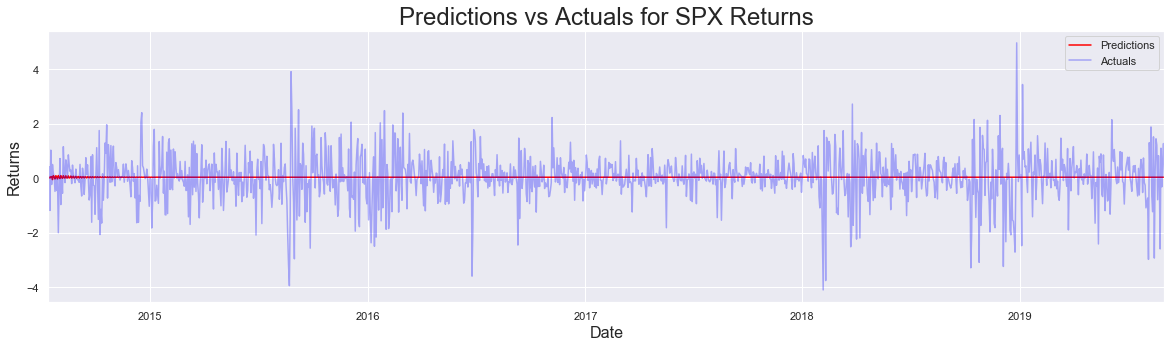

In [60]:
pred_df_ret[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx_ret[start_date:end_date].plot(color = "blue", label='Actuals', alpha=0.3)

plt.title("Predictions vs Actuals for SPX Returns", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Returns', size=16)

plt.legend()
plt.show()

# ARMAX For SPX Returns

#### ACF and PACF Plots for SPX Returns

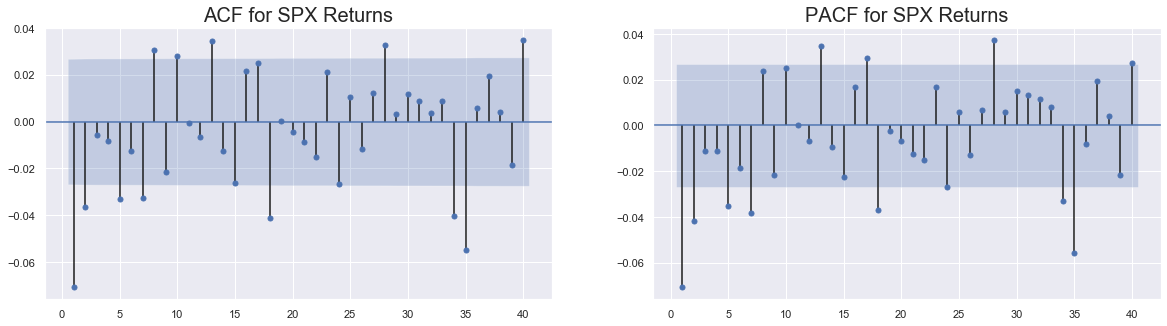

In [61]:
acf_pacf(train_df.spx_ret[1:], "SPX Returns")

#### Defining Function to fit model and plot residuals

In [62]:
def fit_armax_model(p, q, train_data, exog_data):
    armax_p_q_model = ARMA(train_data, order=(p, q), exog=exog_data)
    armax_p_q_model_results = armax_p_q_model.fit()
    
    print("ARMA("+str(p)+", "+str(q)+") MODEL")
    print(armax_p_q_model_results.summary())
    acf_pacf(armax_p_q_model_results.resid, "Residuals of MA("+str(p)+", "+str(q)+")")
    
    return armax_p_q_model_results

ARMA(1, 1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(1, 1)   Log Likelihood               -7248.454
Method:                       css-mle   S.D. of innovations              0.937
Date:                Sat, 13 Jun 2020   AIC                          14506.908
Time:                        18:26:15   BIC                          14539.834
Sample:                    01-07-1994   HQIC                         14518.409
                         - 07-14-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0146      0.009      1.716      0.086      -0.002       0.031
dax_ret           0.5010      0.009     58.411      0.000       0.484       0.518
ar.L1.spx_ret     0.082

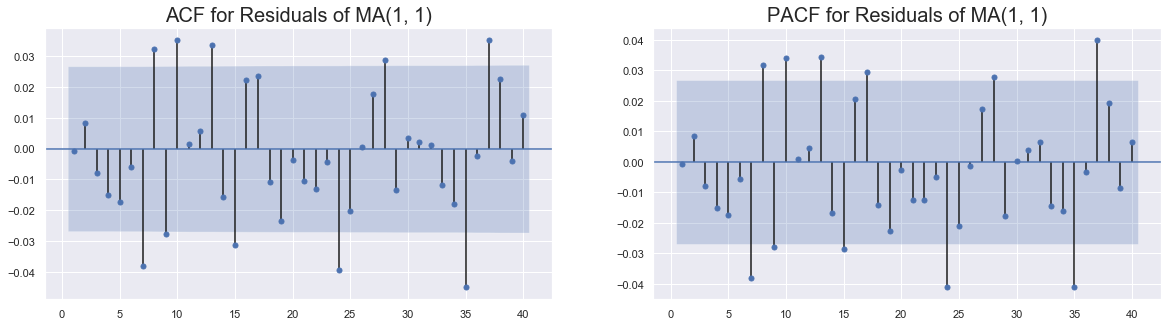

In [63]:
armax_1_1_ret = fit_armax_model(1, 1, train_df.spx_ret[1:], train_df.dax_ret[1:])

#### LLR test between ARMAX(1, 1) and ARMA(7, 4)

In [64]:
LLR_test(armax_1_1_ret, arma_7_4_ret, DF=9)

1.0

#### Predictions over Test Set

In [65]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [66]:
pred_df_exog_ret = armax_1_1_ret.predict(start=start_date, end=end_date, exog=test_df.dax_ret)

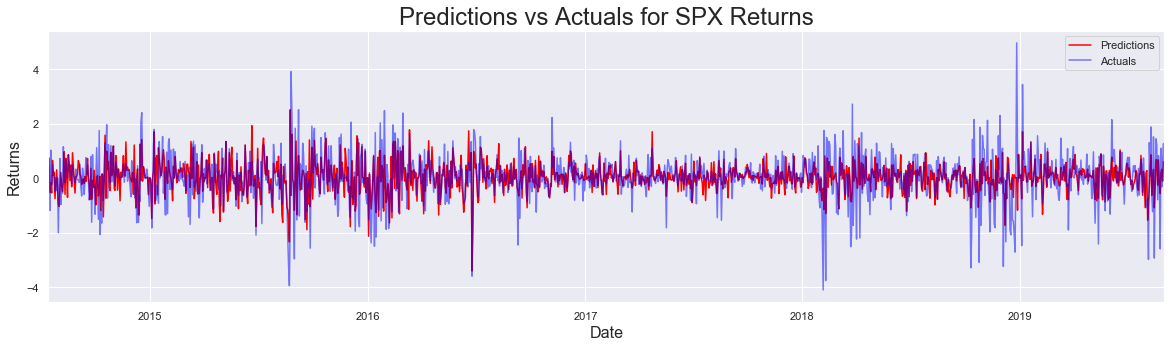

In [67]:
pred_df_exog_ret[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx_ret[start_date:end_date].plot(color = "blue", label='Actuals', alpha=0.5)

plt.title("Predictions vs Actuals for SPX Returns", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Returns', size=16)

plt.legend()
plt.show()

# Comparing Prediction Accuracies

In [68]:
start, end = test_df.index[0], test_df.index[-1]

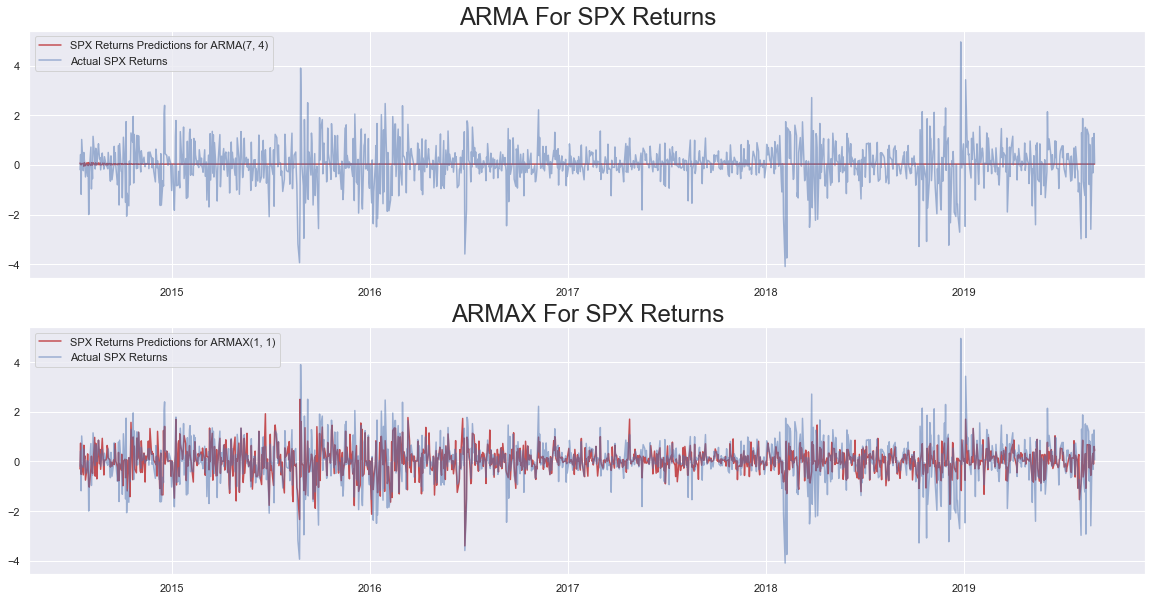

In [69]:
plt.rcParams['figure.figsize'] = 20, 10

fig, ax = plt.subplots(2, 1)

ax[0].plot(pred_df_ret[start:end], color='r', label='SPX Returns Predictions for ARMA(7, 4)')
ax[0].plot(test_df.spx_ret[start:end], color='b', label='Actual SPX Returns', alpha=0.5)
ax[0].set_title('ARMA For SPX Returns', size=24)
ax[0].legend()

ax[1].plot(pred_df_exog_ret[start:end], color='r', label='SPX Returns Predictions for ARMAX(1, 1)')
ax[1].plot(test_df.spx_ret[start:end], color='b', label='Actual SPX Returns', alpha=0.5)
ax[1].set_title('ARMAX For SPX Returns', size=24)
ax[1].legend()

plt.show()

#### RMSE: MA(10) on SPX Returns

In [70]:
mse = mean_squared_error(test_df.spx_ret.values, pred_df_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 0.8389716805277561


#### RMSE: MAX(1) on SPX Returns

In [71]:
mse = mean_squared_error(test_df.spx_ret.values, pred_df_exog_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 0.7294982870464654
